In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import kaleido


In [2]:
df = pd.read_csv(r"E:\SuperStore-Data-Analytics\Data\train.csv")
output = r"E:\SuperStore-Data-Analytics\Output\Visualizations"


In [45]:
print("---Displaying Dataset before any changes---")
df.head()

---Displaying Dataset before any changes---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Abbreviation
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,KY
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,KY
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,CA
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,FL
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,FL


In [4]:
print("--Checking for missing Values---")
df.info()

--Checking for missing Values---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800

In [5]:
# Filling the null values in this case 11 postal codes are missing
print("--Filling missing Values---")
df["Postal Code"].fillna(0, inplace = True)
df["Postal Code"] = df["Postal Code"].astype(int)

--Filling missing Values---


C:\Users\Armghan\AppData\Local\Temp\ipykernel_11888\3283373106.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(0,inplace = True)


In [46]:
#Checking the missing values again
print("---Checking for missing Values after filling---")
df.info()

---Checking for missing Values after filling---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-

In [47]:
print("---Checking for duplicates---")
# Checking for duplicates
if df.duplicated().sum() > 0:
  print("Duplicates Exists")
else:
  print("No Duplicates in this Dataset")



---Checking for duplicates---
No Duplicates in this Dataset


In [8]:
print("--- Displaying the Dataset after fixing missing values---")
df.head(3)

--- Displaying the Dataset after fixing missing values---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [9]:
# now most companies struggle with actual segmentation of customers they dont have any idea about different types of customers they bring they rely on presence of mind rather than actual data so here we
#will focus on customer segmentation

In [10]:
types_of_customers = df['Segment'].unique()
print("---Types of customers---")
print(types_of_customers)

---Types of customers---
['Consumer' 'Corporate' 'Home Office']


In [11]:
#now to determine number of customers
num_of_customers = df['Segment'].value_counts().reset_index()
num_of_customers = num_of_customers.rename(columns = {'Segment' : 'Type of Customers'})

print("---Number of Customers---")
print(num_of_customers)


---Number of Customers---
  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


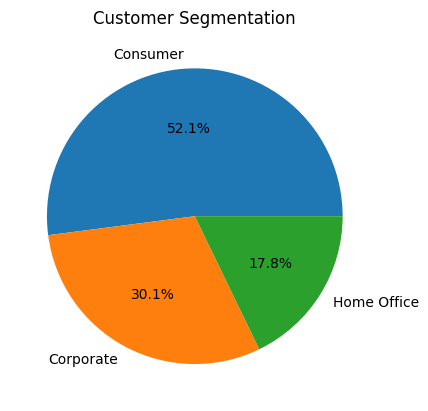

In [12]:
plt.pie(num_of_customers['count'], labels = num_of_customers['Type of Customers'], autopct = '%1.1f%%')
plt.title('Customer Segmentation')
plt.savefig(f"{output}/Customer_Segmentation_by_type_pie_chart.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()


--- Displaying Sales per Segment ---
  Type of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


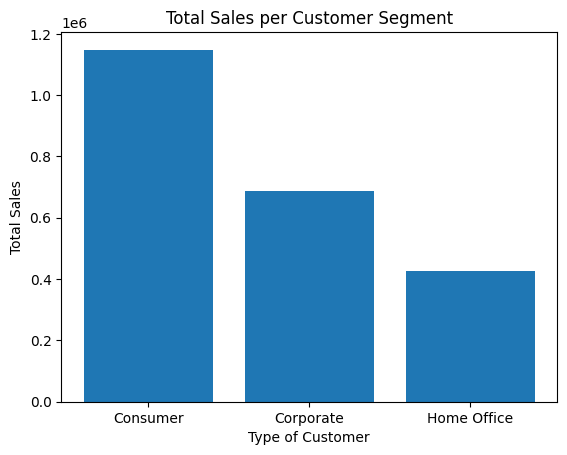

In [13]:
#now we'll balance resource allocation for all 3 segments of customer to maximize growth
#to gain a deeper insight we should integrate our customer data with sales_figures
#this analysis will help us identify which segment generated most sales
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns = {'Segment' : 'Type of Customer', 'Sales' : 'Total Sales'})
print("--- Displaying Sales per Segment ---")
print(sales_per_segment)

plt.bar(sales_per_segment['Type of Customer'], sales_per_segment['Total Sales'])
plt.xlabel('Type of Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer Segment')
plt.savefig(f"{output}/Total_Sales_per_customer_segment_bar_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()


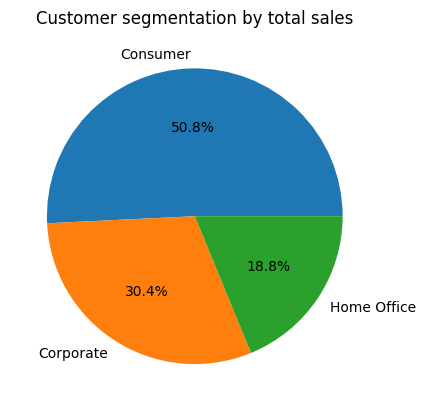

In [14]:
# now lets calculate customer lifetime value CLTV of each segment
plt.pie(sales_per_segment['Total Sales'], labels = sales_per_segment['Type of Customer'], autopct = '%1.1f%%')
plt.title('Customer segmentation by total sales')
plt.savefig(f"{output}/Customer_segmentation_by_total_sales_pie_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Group by 'Customer ID', 'Customer Name', 'Segment' and count 'Order ID'
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename the column correctly without using inplace
customer_order_frequency = customer_order_frequency.rename(columns={'Order ID': 'Total Orders'})

# Filter customers with at least one order
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

# Sort customers by 'Total Orders' in descending order
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

print("---Displaying the Repeated Customers---")
# Print the required results
print(repeat_customers_sorted.head(12).reset_index(drop=True))



---Displaying the Repeated Customers---
   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    BM-11650           Brian Moss    Corporate            29


In [16]:
#lets identify our top spending customer
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spender = customer_sales.sort_values(by='Sales', ascending=False)

print("---Displaying the Top Spending Customers---")
print(top_spender.head(12).reset_index(drop=True))

---Displaying the Top Spending Customers---
   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [17]:
# now analyzing shipping methods
shipping_models = df['Ship Mode'].value_counts().reset_index()
shipping_models = shipping_models.rename(columns = {'index' : 'Use Frequency', 'Ship Mode' : 'Mode of Shipment'})

print("---Displaying the Shipping Modes---")
print(shipping_models)


---Displaying the Shipping Modes---
  Mode of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


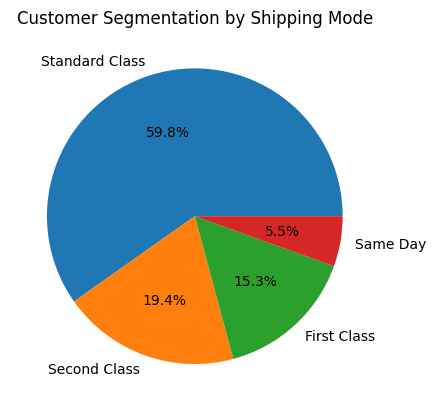

In [18]:
plt.pie(shipping_models['count'], labels = shipping_models['Mode of Shipment'], autopct = '%1.1f%%')
plt.title('Customer Segmentation by Shipping Mode')
plt.savefig(f"{output}/Customer_Segmentation_by_shipping_mode_pie_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# now we analyze by states
state = df['State'].value_counts().reset_index()
state = state.rename(columns = {'index' : 'State', 'State' : 'Number of Customers'})

print("---Displaying the States---")
print(state.head(20))

---Displaying the States---
   Number of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


In [20]:
#now we analyze by cities
City = df['City'].value_counts().reset_index()
City = City.rename(columns = {'index' : 'City', 'City' : 'Number of Customers'})

print("---Displaying the Number of Customer per Cities---")
print(City.head(25))

---Displaying the Number of Customer per Cities---
   Number of Customers  count
0        New York City    891
1          Los Angeles    728
2         Philadelphia    532
3        San Francisco    500
4              Seattle    426
5              Houston    374
6              Chicago    308
7             Columbus    221
8            San Diego    170
9          Springfield    161
10              Dallas    156
11        Jacksonville    125
12             Detroit    115
13              Newark     92
14             Jackson     82
15            Columbia     81
16            Richmond     81
17              Aurora     68
18             Phoenix     63
19           Arlington     60
20         San Antonio     59
21               Miami     56
22          Louisville     54
23           Rochester     53
24          Long Beach     52


In [21]:
#analyzing sales by states
state_sales  = df.groupby('State')['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by = 'Sales', ascending = False)

print("---Displaying the States with Highest Sales---")
print(top_sales.head(25).reset_index(drop = True))

---Displaying the States with Highest Sales---
             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500
20   Massachusetts   28634.4340
21        Delaware   27322.9990
22        Maryland   23705.5230
23    Rhode Island   22525.0260
24        Missouri   22205.1500


In [22]:
#now sorting it per city
city_sales = df.groupby('City')['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by = 'Sales', ascending = False)

print("---Displaying the Cities with Highest Sales---")
print(top_city_sales.head(25).reset_index(drop = True))

---Displaying the Cities with Highest Sales---
             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482
20       Lakewood   18183.1070
21       Richmond   17663.8700
22      Henderson   17549.0680
23        Atlanta   17197.8400
24    Minneapolis   16870.5400


In [23]:
# now working with products - first we extract product categories
products = df['Category'].unique()
print("---Displaying the Main Product Categories---")
print(products)

---Displaying the Main Product Categories---
['Furniture' 'Office Supplies' 'Technology']


In [24]:
print("Printing the Dataset Again after some changes---")
df.head(100)

Printing the Dataset Again after some changes---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2018-109484,06/11/2018,12/11/2018,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820
96,97,CA-2018-161018,09/11/2018,11/11/2018,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300
97,98,CA-2018-157833,17/06/2018,20/06/2018,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120
98,99,CA-2017-149223,06/09/2017,11/09/2017,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800


In [25]:
#on to the subcategory of product
product_subcategory = df['Sub-Category'].unique()

print("---Displaying the Sub-Categories---")
print(product_subcategory)

---Displaying the Sub-Categories---
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [26]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)

print("---Displaying the Number of Sub-Categories per Main Category---")
print(subcategory_count)

---Displaying the Number of Sub-Categories per Main Category---
          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [44]:
#now to see top performing subcategory
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = False)

print("---Displaying the Sales per Sub-Category---")
print(subcategory_count_sales)

---Displaying the Sales per Sub-Category---
           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [28]:
#now lets see top performing main category
product_category =df.groupby(['Category'])['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by = 'Sales', ascending = False)

print("---Displaying the Sales per Main Category---")
print(top_product_category.reset_index(drop = True))

---Displaying the Sales per Main Category---
          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


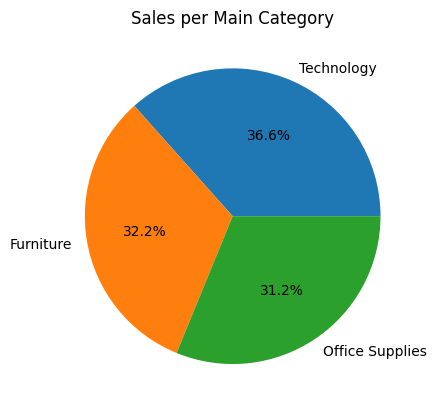

In [29]:
plt.pie(top_product_category['Sales'], labels = top_product_category['Category'], autopct = '%1.1f%%')
plt.title('Sales per Main Category')
plt.savefig(f"{output}/Sales_per_main_category_pie_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

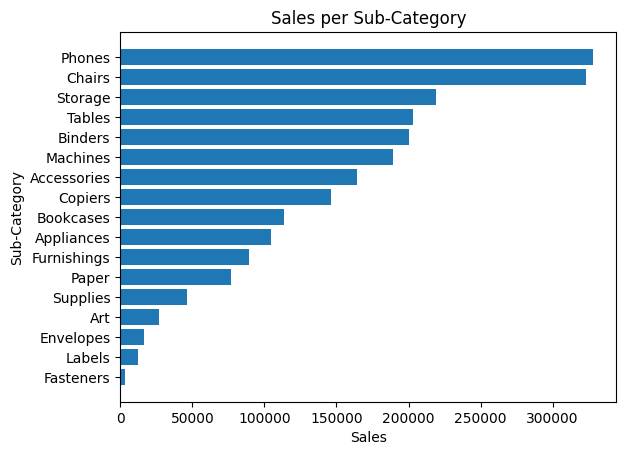

In [ ]:


#now let's see top performing subcategory in descending order
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title('Sales per Sub-Category')
plt.savefig(f"{output}/Sales_per_subcategory_bar_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
#now to calculate Yearly sales
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns = {'Order Date' : 'Year', 'Sales' : 'Total Sales'})

# Print the required results

print("---Displaying the Yearly Sales---")
print(yearly_sales)


---Displaying the Yearly Sales---
   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


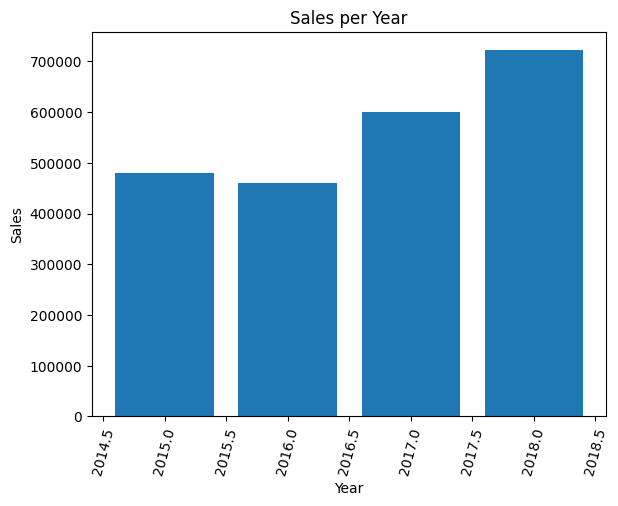

In [32]:
# Yearly Sales Bar chart
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales per Year')
plt.tight_layout()
plt.xticks(rotation = 75)
plt.savefig(f"{output}/Sales_per_year_bar_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

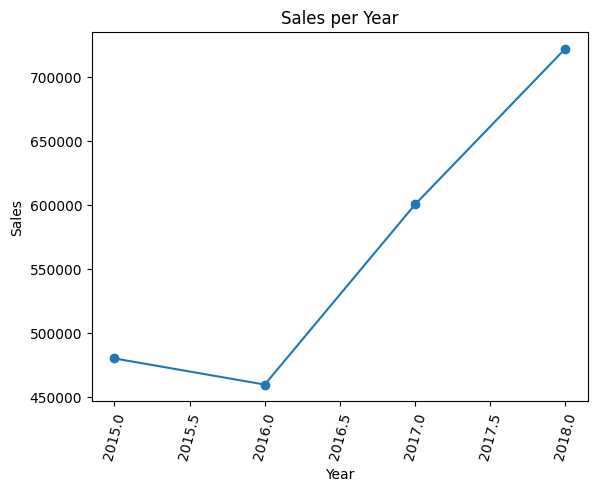

In [33]:
# Sales per year Line Chart
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker ='o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales per Year')
plt.xticks(rotation = 75)
plt.savefig(f"{output}/Sales_per_year_line_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# now lets calculate quarterly sales
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = year_sales.resample('QE', on = 'Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns = {'Order Date' : 'Quarter', 'Sales' : 'Total Sales'})

# Print the required results

print("---Displaying the Quarterly Sales---")
print(quarterly_sales)

---Displaying the Quarterly Sales---
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


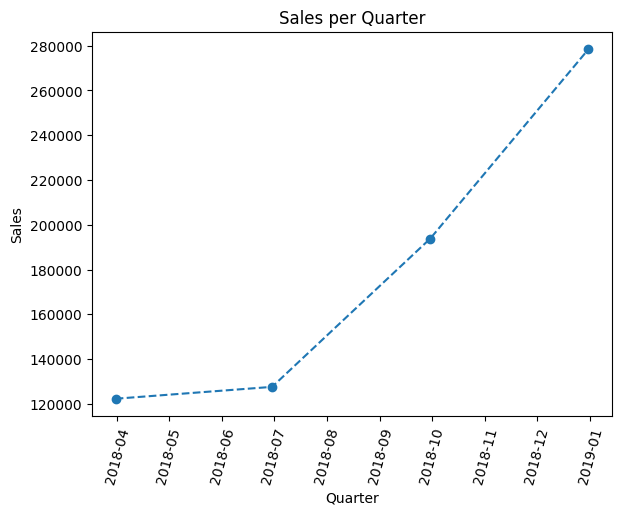

In [35]:
# Quarterly Sales Line Chart
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker ='o', linestyle = '--')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Sales per Quarter')
plt.tight_layout()
plt.xticks(rotation = 75)
plt.savefig(f"{output}/Sales_per_quarter_line_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
#now onto monthly_sales
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = year_sales.resample('ME', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns = {'Order Date' : 'Month', 'Sales' : 'Total Sales'})

# Print the required results

print("---Displaying the Monthly Sales---")
print(monthly_sales)

---Displaying the Monthly Sales---
        Month  Total Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


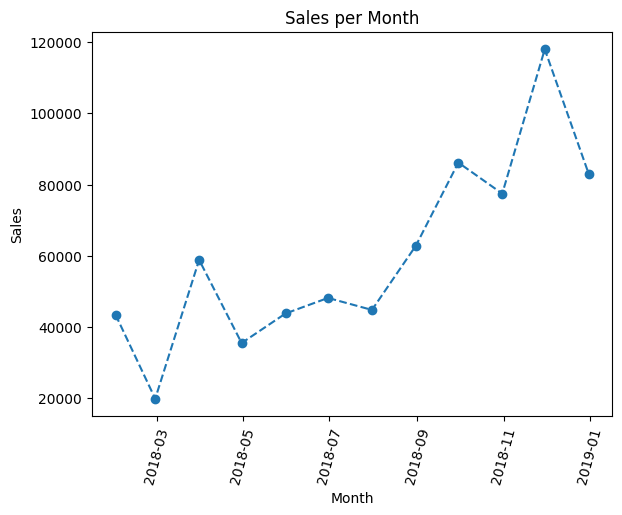

In [37]:

# Monthly Sales Line Chart
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker ='o', linestyle = '--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.tight_layout()
plt.xticks(rotation = 75)
plt.savefig(f"{output}/Sales_per_month_line_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# Now onto the Mapping
#mapping by State for Product/Services
#Creating Mapping for all 50 states
all_state_mapping ={
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
#add the abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

#Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

#Add Abbreviation to sum of sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

#Create a choropleth map using plotly
fig = go.Figure(data = go.Choropleth(locations = sum_of_sales['Abbreviation'],
                                     locationmode='USA-states',
                                     z=sum_of_sales['Sales'],
                                     hoverinfo = 'location+z',
                                     showscale=True))

fig.update_geos(projection_type="albers usa")
fig.update_layout(title_text="Total Sales by U.S. State", geo_scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(f"{output}/Total_sales_choropleth_map.jpg")
fig.show()


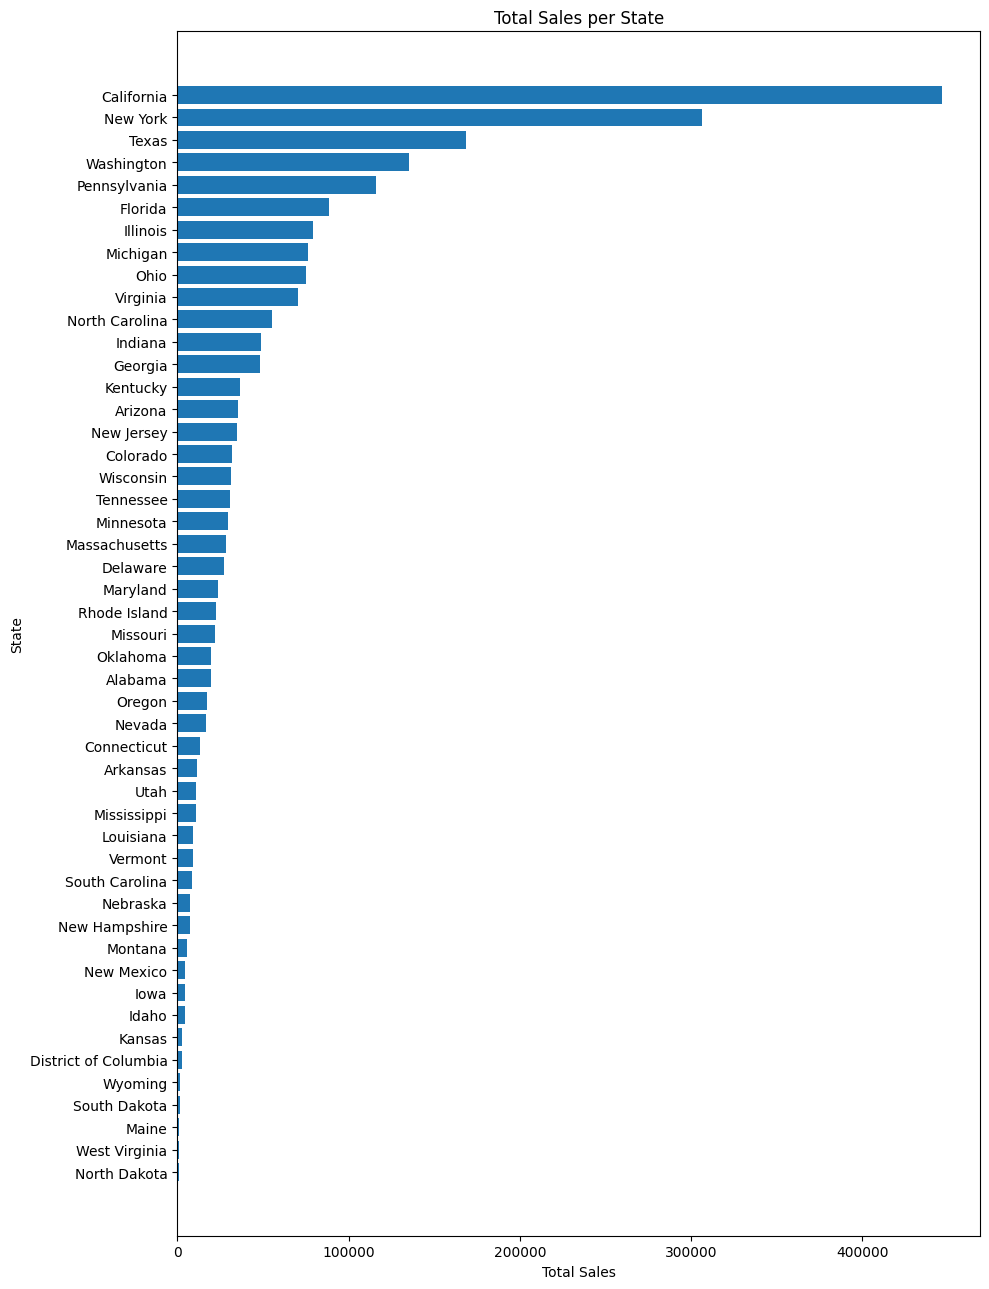

In [39]:
#bar chart per state
#Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=True)

#Create a horizantal bar graph
plt.figure(figsize=(10, 13))
plt.barh(sum_of_sales['State'], sum_of_sales['Sales'])
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Total Sales per State')
plt.tight_layout()
plt.savefig(f"{output}/Sales_per_state_bar_chart.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

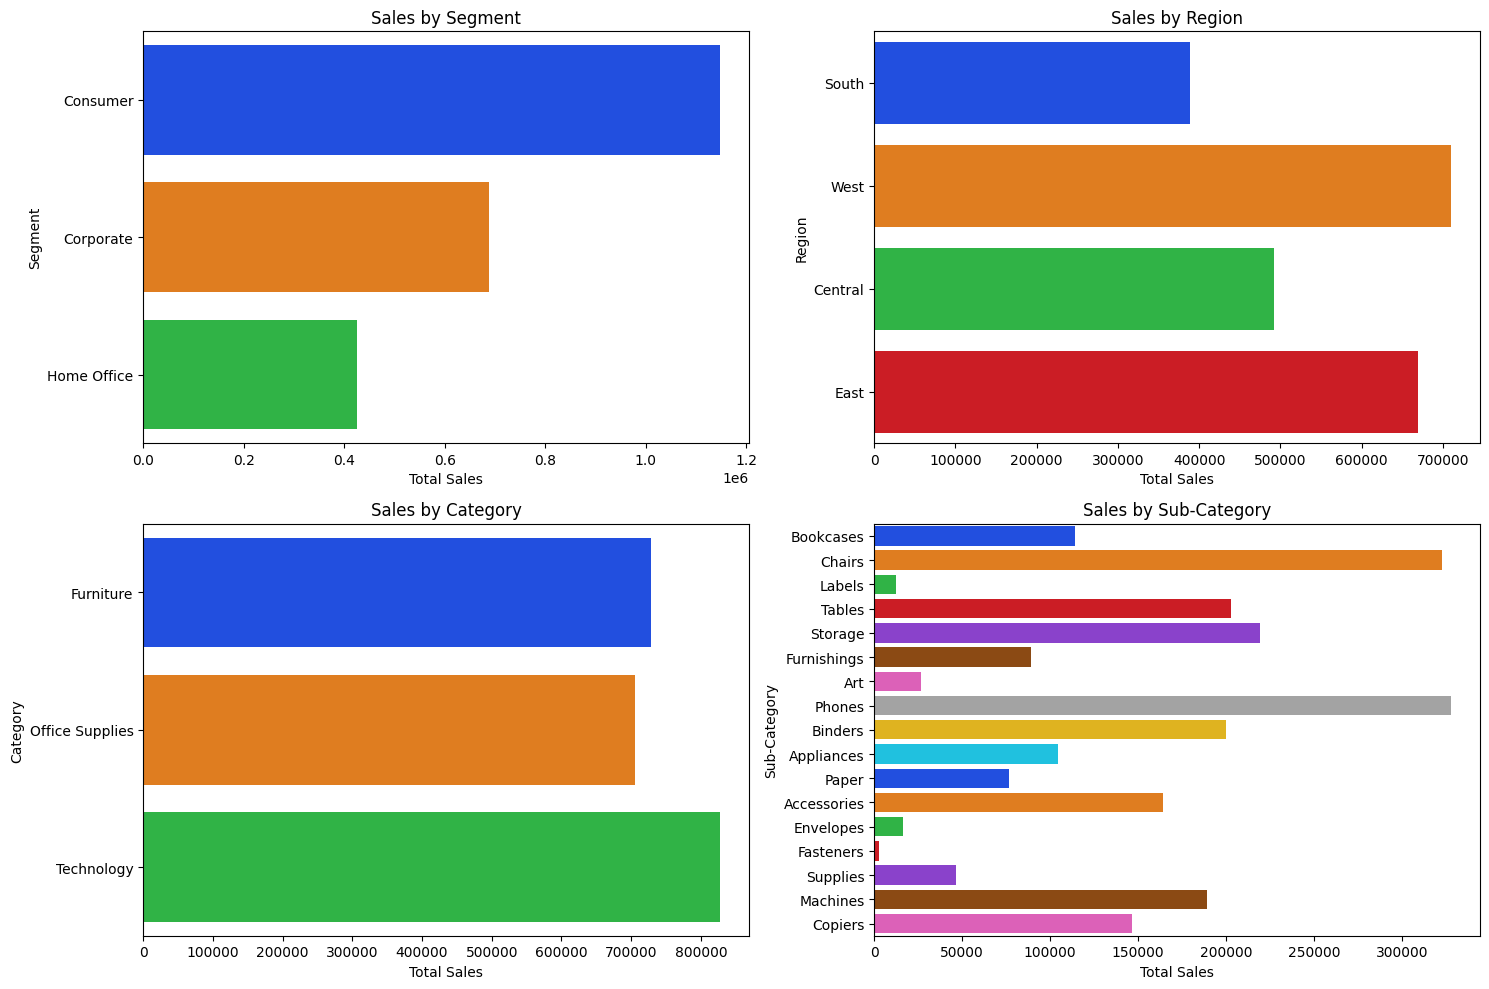

In [40]:

#Create subplots per segment, region, category and subcategory
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
  ax = axes[i // 2, i % 2]
  sns.barplot(x='Sales', y=column, data=df, ax=ax, estimator=np.sum, errorbar=None,palette='bright', hue=column)
  ax.set_xlabel('Total Sales')
  ax.set_ylabel(column)
  ax.set_title(f'Sales by {column}')

plt.tight_layout()
plt.savefig(f"{output}/Sales_per_category_and_sub_category_bar_charts.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
#Summarize the Sales data by Category and Sub category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
#Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'], values='Sales',
    color='Sales',
    color_continuous_scale='RdBu',
    title='Sales by Category and Sub-Category'
)

fig.update_layout(margin=dict(t=50, l=50, r=50, b=50))
fig.write_image(f"{output}/Sales_per_category_and_sub_category_sunburst_chart.jpg")

fig.show()


In [42]:
#Summarize the Sales data by category, Ship Mode and Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Create a treemap
fig = px.treemap(df_summary, path=['Category','Ship Mode', 'Sub-Category'], values='Sales')
fig.update_layout(margin=dict(t=50, l=50, r=50, b=50))
fig.write_image(f"{output}/Sales_per_category_ship_mode_and_sub_category_treemap_chart.jpg")
fig.show()
